In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 데이터 확인

In [2]:
red = pd.read_csv('./data/chapter05_winequality_red.csv', sep=';')
white = pd.read_csv('./data/chapter05_winequality_white.csv', sep=';')

In [3]:
df = pd.concat([red, white])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# EDA & 전처리

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [5]:
# 결측치는 없다
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
df['target'] = np.where(df['quality']>6, 1, 0)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [14]:
# 프리미엄 Wine을 예측하는 Classification 문제로 변경
df['target'].value_counts()

0    5220
1    1277
Name: target, dtype: int64

- 클래스 불균형 확인

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(['quality', 'target'], axis=1)
Y = df['target']

train_x, test_x, train_y, test_y = train_test_split(X, Y, stratify=Y, random_state=29)

In [25]:
# kNN을 사용한 클래스 불균형 테스트
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import *

kNN_model = KNN(n_neighbors = 5).fit(train_x, train_y)

pred_Y = kNN_model.predict(test_x)
print('recall_score: ', recall_score(test_y, pred_Y))
print('accuracy_score: ', accuracy_score(test_y, pred_Y))

recall_score:  0.3730407523510972
accuracy_score:  0.8073846153846154


In [22]:
from imblearn.over_sampling import SMOTE

# SMOTE 인스턴스 생성
oversampling_instance = SMOTE(k_neighbors = 3, sampling_strategy = {1:int(train_y.value_counts().iloc[0] / 2), # 기존의 -1 클래스의 크기에서 1/2 수 만큼 생성
                                                                    0:train_y.value_counts().iloc[0]}) # 기존의 -1 인 클래스 수와 동일하도록

# 오버샘플링 적용
o_Train_X, o_Train_Y = oversampling_instance.fit_resample(train_x, train_y)

# ndarray 형태가 되므로 다시 DataFrame과 Series로 변환 (남은 전처리가 없다면 하지 않아도 무방)
o_Train_X = pd.DataFrame(o_Train_X, columns = X.columns)
o_Train_Y = pd.Series(o_Train_Y)

In [23]:
o_Train_Y.value_counts()

0    3914
1    1957
Name: target, dtype: int64

## 품질 정보 확인

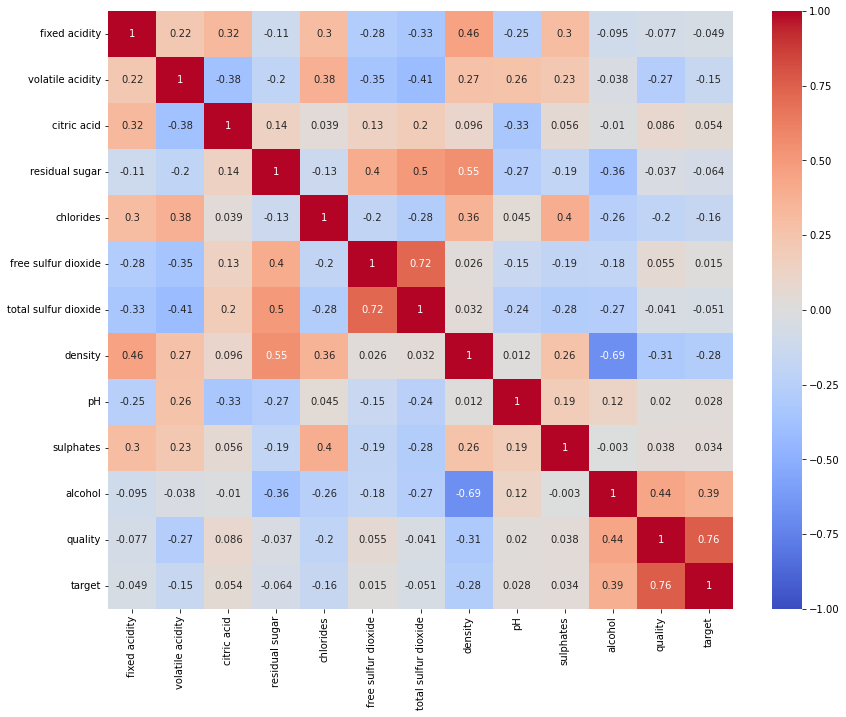

In [11]:
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');
plt.gcf().set_size_inches(14, 11)

In [31]:
(abs(df.corr()).sum(axis=1) / len(df.columns)).sort_values(ascending=False)

total sulfur dioxide    0.333823
density                 0.333755
volatile acidity        0.319304
residual sugar          0.303376
alcohol                 0.296255
fixed acidity           0.292172
chlorides               0.287709
free sulfur dioxide     0.284413
quality                 0.256154
sulphates               0.242657
target                  0.233445
pH                      0.224075
citric acid             0.218836
dtype: float64

In [32]:
(df.corr().sum(axis=1) / len(df.columns)).sort_values(ascending=False)

sulphates               0.142174
density                 0.138671
target                  0.117506
quality                 0.113487
citric acid             0.108331
fixed acidity           0.107846
chlorides               0.099558
residual sugar          0.095596
free sulfur dioxide     0.077568
volatile acidity        0.042984
total sulfur dioxide    0.042185
pH                      0.034214
alcohol                 0.004676
dtype: float64

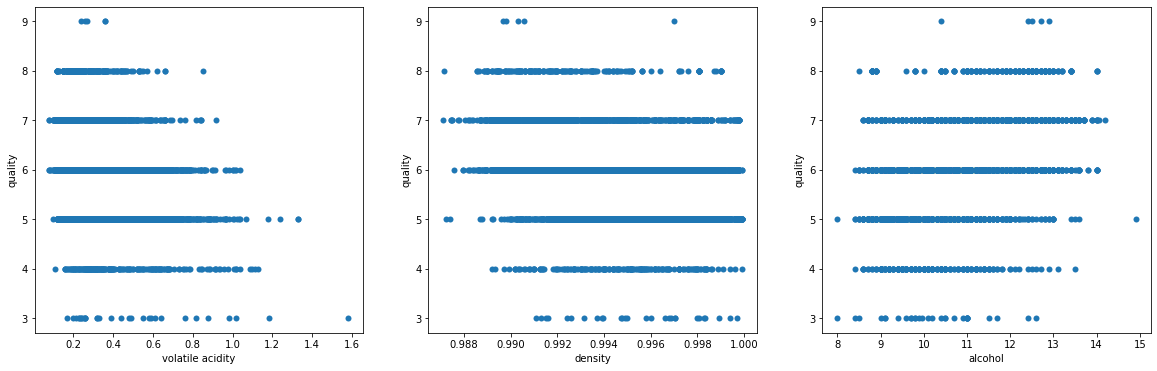

In [26]:
# ▶ 상관계수(0.2) 이상의 상관관계를 가지는 변수 집중 탐색
# ▶ 등급이 올라갈수록 volatile acidity(휘발선상)이 낮아지는 경향성이 보임

fig, axes = plt.subplots(1, 3)
sns.scatterplot(data = df, x='volatile acidity', y='quality', linewidth=0, ax=axes[0]);
sns.scatterplot(x=df[df['density']<1]['density'], y=df[df['density']<1]['quality'], linewidth=0, ax=axes[1]);
sns.scatterplot(x=df['alcohol'], y=df['quality'], linewidth=0, ax=axes[2]);
plt.gcf().set_size_inches(20, 6)

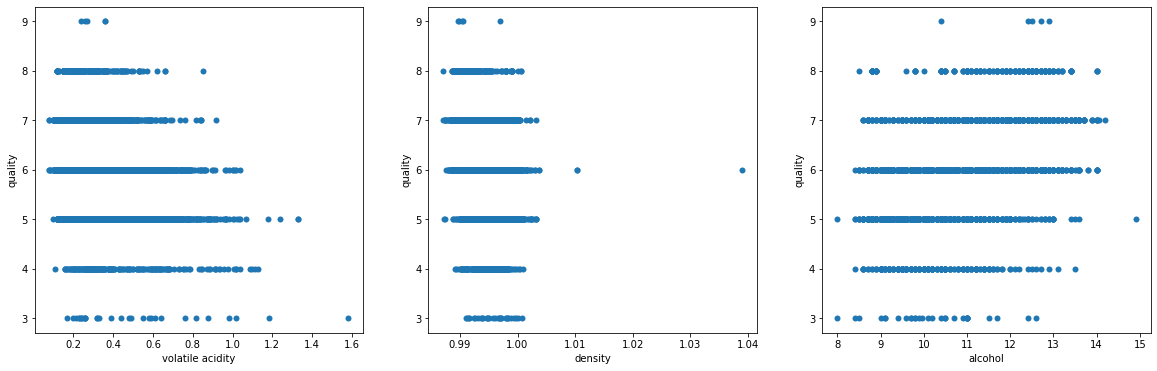

In [33]:
fig, axes = plt.subplots(1, 3)
sns.scatterplot(data = df, x='volatile acidity', y='quality', linewidth=0, ax=axes[0]);
sns.scatterplot(data=df, x='density', y='quality', linewidth=0, ax=axes[1]);
sns.scatterplot(data=df, x='alcohol', y='quality', linewidth=0, ax=axes[2]);
plt.gcf().set_size_inches(20, 6)

# 품질 주요인자 확인 - 회귀 모델링

In [35]:
# 입력 데이터들 확인
train_x.shape, train_y.shape, test_x.shape, test_y.shape, o_Train_X.shape, o_Train_Y.shape

((4872, 11), (4872,), (1625, 11), (1625,), (5871, 11), (5871,))

In [40]:
# LR(선형회귀) 모델 활용
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error, r2_score

In [85]:
lr = LR()
lr.fit(train_x, train_y)

pred_train = lr.predict(train_x)
pred_test = lr.predict(test_x)

mae_train = mean_absolute_error(train_y, pred_train)
r2_train = r2_score(train_y, pred_train)

mae_test = mean_absolute_error(test_y, pred_test)
r2_test = r2_score(test_y, pred_test)

print(f'mae train: ', mae_train)
print('r2 train: ', r2_train)
print('-'*20)
print('mae test: ', mae_test)
print('r2 test: ', r2_test)

mae train:  0.267818619333233
r2 train:  0.19844504769653282
--------------------
mae test:  0.27467166147572714
r2 test:  0.17100151159564436


In [86]:
# 실제 값과 예측 값에 대해 표현
df_result = pd.DataFrame({'Real Values':test_y, 'Predicted Values':pred_test}).reset_index(drop=True)
df_result['diff'] = df_result['Real Values'] - df_result['Predicted Values']
df_result.head(5)

,Real Values,Predicted Values,diff
0,0,-0.103169,0.103169
1,0,0.130475,-0.130475
2,1,0.025888,0.974112
3,0,0.342328,-0.342328
4,0,0.035725,-0.035725


In [87]:
# 실제 값과 예측 값에 대해 표현 : 0.5보다 낮으면 0, 높으면 1로 해서 
df_result = pd.DataFrame({'Real Values':test_y, 'Predicted Values':pred_test.round()}).reset_index(drop=True)
df_result['diff'] = df_result['Real Values'] - df_result['Predicted Values']
df_result.head(5)

,Real Values,Predicted Values,diff
0,0,-0.0,0.0
1,0,0.0,0.0
2,1,0.0,1.0
3,0,0.0,0.0
4,0,0.0,0.0


In [88]:
df_coef = pd.DataFrame({'col':X.columns, 'coef':lr.coef_}).reset_index(drop=True)
df_coef.sort_values('coef')

,col,coef
7,density,-45.360368
4,chlorides,-0.247215
1,volatile acidity,-0.227412
6,total sulfur dioxide,-0.000687
5,free sulfur dioxide,0.001618
2,citric acid,0.011054
3,residual sugar,0.023256
0,fixed acidity,0.050725
10,alcohol,0.080262
8,pH,0.276212


In [89]:
lr = LR()
lr.fit(o_Train_X, o_Train_Y)

pred_train = lr.predict(o_Train_X)
pred_test = lr.predict(test_x)

mae_train = mean_absolute_error(o_Train_Y, pred_train)
r2_train = r2_score(o_Train_Y, pred_train)

mae_test = mean_absolute_error(test_y, pred_test)
r2_test = r2_score(test_y, pred_test)

print(f'mae train: ', mae_train)
print('r2 train: ', r2_train)
print('-'*20)
print('mae test: ', mae_test)
print('r2 test: ', r2_test)

mae train:  0.34575993988535864
r2 train:  0.24948126270298
--------------------
mae test:  0.31956417608207155
r2 test:  0.07133318420475421


In [90]:
df_coef = pd.DataFrame({'col':X.columns, 'coef':lr.coef_}).reset_index(drop=True)
df_coef.sort_values('coef')

,col,coef
7,density,-64.505357
1,volatile acidity,-0.444820
4,chlorides,-0.431788
2,citric acid,-0.114272
6,total sulfur dioxide,-0.000893
5,free sulfur dioxide,0.001748
3,residual sugar,0.033490
0,fixed acidity,0.082529
10,alcohol,0.094533
8,pH,0.330807


In [93]:
# 다중공선성 확인
df.corr()[(abs(df.corr()) > 0.5) & (df.corr() != 1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
fixed acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatile acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.552517,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,0.720934,NaN,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,0.720934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
density,NaN,NaN,NaN,0.552517,NaN,NaN,NaN,NaN,NaN,NaN,-0.686745,NaN,NaN
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
X = df.drop(['residual sugar', 'free sulfur dioxide', 'quality', 'target'], axis=1)
Y = df['target']

train_x, test_x, train_y, test_y = train_test_split(X, Y, stratify=Y)

lr.fit(train_x, train_y)
train_pred = lr.predict(train_x)
test_pred = lr.predict(test_x)

mae_train = mean_absolute_error(train_y, train_pred)
r2_train = r2_score(train_y, train_pred)

mae_test = mean_absolute_error(test_y, test_pred)
r2_test = r2_score(test_y, test_pred)

print(f'mae train: ', mae_train)
print('r2 train: ', r2_train)
print('-'*20)
print('mae test: ', mae_test)
print('r2 test: ', r2_test)

mae train:  0.2719221004568015
r2 train:  0.17555338220136418
--------------------
mae test:  0.2674529373002626
r2 test:  0.18463224725622918


In [144]:
df_coef = pd.DataFrame({'col':X.columns, 'coef':lr.coef_}).reset_index(drop=True)
df_coef.sort_values('coef')

,col,coef
3,chlorides,-0.503231
1,volatile acidity,-0.350870
2,citric acid,-0.003886
4,total sulfur dioxide,0.000050
0,fixed acidity,0.002139
6,pH,0.022191
8,alcohol,0.129389
7,sulphates,0.212200
5,density,3.007745


# 품질 주요인자 확인 - 분류 모델링

In [160]:
from lightgbm import LGBMClassifier as LGB
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score, accuracy_score

In [146]:
X = df.drop(['quality', 'target'], axis=1)
Y = df['target']

train_x, test_x, train_y, test_y = train_test_split(X, Y, stratify=Y, random_state=29)

- 다시 업샘플링을 진행

In [147]:
# SMOTE 인스턴스 생성
oversampling_instance = SMOTE(k_neighbors = 3, sampling_strategy = {1:int(train_y.value_counts().iloc[0] / 2), # 기존의 -1 클래스의 크기에서 1/2 수 만큼 생성
                                                                    0:train_y.value_counts().iloc[0]}) # 기존의 -1 인 클래스 수와 동일하도록

# 오버샘플링 적용
o_Train_X, o_Train_Y = oversampling_instance.fit_resample(train_x, train_y)

# ndarray 형태가 되므로 다시 DataFrame과 Series로 변환 (남은 전처리가 없다면 하지 않아도 무방)
o_Train_X = pd.DataFrame(o_Train_X, columns = X.columns)
o_Train_Y = pd.Series(o_Train_Y)

In [148]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape, o_Train_X.shape, o_Train_Y.shape

((4872, 11), (1625, 11), (4872,), (1625,), (5871, 11), (5871,))

In [149]:
LGB().get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [150]:
RFC().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [153]:
model_parameter_dict = dict()

RFR_param_grid = ParameterGrid({
                                'max_depth':[3, 5, 10, 15],
                                'n_estimators':[100, 200, 400],
                                'n_jobs':[-1]
})
LGB_param_grid = ParameterGrid({
                                'max_depth':[3, 5, 10, 15],
                                'n_estimators':[100, 200, 400],
                                'learning_rate':[0.05, 0.1, 0.2]
})

model_parameter_dict[RFC] = RFR_param_grid
model_parameter_dict[LGB] = LGB_param_grid

In [156]:
max_iter = 0
for m in model_parameter_dict.keys():
    for p in model_parameter_dict[m]:
        model = m(**p)
        max_iter += 1
print(max_iter)

48


In [167]:
best_score = -1
iteration_num = 0
knn_list = []
rfr_list = []
lgb_list = []

for m in model_parameter_dict.keys():
    for p in model_parameter_dict[m]:
        model = m(**p).fit(train_x.values, train_y.values)
        pred = model.predict(test_x.values)
        score = f1_score(test_y.values, pred)
        acc = accuracy_score(test_y.values, pred)

        if score > best_score:
            best_score = score
            best_model = m
            best_parameter = p
            accuracy = acc
            
        if m == KNN:
            knn_list.append(score)
        elif m == RFC:
            rfr_list.append(score)
        elif m == LGB:
            lgb_list.append(score)
        
        iteration_num += 1

        print(f'iter_num-{iteration_num}/{max_iter} => score : {score:.3f}, best score : {best_score:.3f} | acc : {accuracy}')

iter_num-1/48 => score : 0.155, best score : 0.155 | acc : 0.8184615384615385
iter_num-2/48 => score : 0.094, best score : 0.155 | acc : 0.8184615384615385
iter_num-3/48 => score : 0.105, best score : 0.155 | acc : 0.8184615384615385
iter_num-4/48 => score : 0.344, best score : 0.344 | acc : 0.8307692307692308
iter_num-5/48 => score : 0.335, best score : 0.344 | acc : 0.8307692307692308
iter_num-6/48 => score : 0.324, best score : 0.344 | acc : 0.8307692307692308
iter_num-7/48 => score : 0.566, best score : 0.566 | acc : 0.8621538461538462
iter_num-8/48 => score : 0.578, best score : 0.578 | acc : 0.8689230769230769
iter_num-9/48 => score : 0.581, best score : 0.581 | acc : 0.8670769230769231
iter_num-10/48 => score : 0.653, best score : 0.653 | acc : 0.8849230769230769
iter_num-11/48 => score : 0.639, best score : 0.653 | acc : 0.8849230769230769
iter_num-12/48 => score : 0.625, best score : 0.653 | acc : 0.8849230769230769
iter_num-13/48 => score : 0.438, best score : 0.653 | acc : 0

In [169]:
print('best_f1_score: ', best_score, '| best_acc_score', accuracy, '\nbest_model: ', best_model, '\nbest_parameter: ', best_parameter)

best_f1_score:  0.6618705035971223 | best_acc_score 0.8843076923076924 
best_model:  <class 'lightgbm.sklearn.LGBMClassifier'> 
best_parameter:  {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}


In [173]:
# best 모델 학습
model = best_model(**best_parameter).fit(train_x.values, train_y.values)

train_pred = model.predict(train_x.values)
test_pred = model.predict(test_x.values)

print(classification_report(train_y, train_pred))
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3914
           1       1.00      1.00      1.00       958

    accuracy                           1.00      4872
   macro avg       1.00      1.00      1.00      4872
weighted avg       1.00      1.00      1.00      4872

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1306
           1       0.78      0.58      0.66       319

    accuracy                           0.88      1625
   macro avg       0.84      0.77      0.80      1625
weighted avg       0.88      0.88      0.88      1625



### 업샘플링 데이터로 다시

In [174]:
best_score = -1
iteration_num = 0
knn_list = []
rfr_list = []
lgb_list = []

for m in model_parameter_dict.keys():
    for p in model_parameter_dict[m]:
        model = m(**p).fit(o_Train_X.values, o_Train_Y.values)
        pred = model.predict(test_x.values)
        score = f1_score(test_y.values, pred)
        acc = accuracy_score(test_y.values, pred)

        if score > best_score:
            best_score = score
            best_model = m
            best_parameter = p
            accuracy = acc
            
        if m == KNN:
            knn_list.append(score)
        elif m == RFC:
            rfr_list.append(score)
        elif m == LGB:
            lgb_list.append(score)
        
        iteration_num += 1

        print(f'iter_num-{iteration_num}/{max_iter} => score : {score:.3f}, best score : {best_score:.3f} | acc : {accuracy}')

iter_num-1/48 => score : 0.489, best score : 0.489 | acc : 0.7993846153846154
iter_num-2/48 => score : 0.492, best score : 0.492 | acc : 0.7938461538461539
iter_num-3/48 => score : 0.495, best score : 0.495 | acc : 0.7956923076923077
iter_num-4/48 => score : 0.570, best score : 0.570 | acc : 0.820923076923077
iter_num-5/48 => score : 0.546, best score : 0.570 | acc : 0.820923076923077
iter_num-6/48 => score : 0.548, best score : 0.570 | acc : 0.820923076923077
iter_num-7/48 => score : 0.632, best score : 0.632 | acc : 0.8516923076923076
iter_num-8/48 => score : 0.639, best score : 0.639 | acc : 0.8523076923076923
iter_num-9/48 => score : 0.632, best score : 0.639 | acc : 0.8523076923076923
iter_num-10/48 => score : 0.657, best score : 0.657 | acc : 0.8683076923076923
iter_num-11/48 => score : 0.662, best score : 0.662 | acc : 0.8683076923076923
iter_num-12/48 => score : 0.652, best score : 0.662 | acc : 0.8683076923076923
iter_num-13/48 => score : 0.551, best score : 0.662 | acc : 0.86

In [175]:
print('best_f1_score: ', best_score, '| best_acc_score', accuracy, '\nbest_model: ', best_model, '\nbest_parameter: ', best_parameter)

best_f1_score:  0.6655462184873949 | best_acc_score 0.8775384615384615 
best_model:  <class 'lightgbm.sklearn.LGBMClassifier'> 
best_parameter:  {'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 400}


In [176]:
# best 모델 학습
model = best_model(**best_parameter).fit(o_Train_X.values, o_Train_Y.values)

train_pred = model.predict(o_Train_X.values)
test_pred = model.predict(test_x.values)

print(classification_report(o_Train_Y, train_pred))
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3914
           1       0.99      1.00      0.99      1957

    accuracy                           1.00      5871
   macro avg       1.00      1.00      1.00      5871
weighted avg       1.00      1.00      1.00      5871

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1306
           1       0.72      0.62      0.67       319

    accuracy                           0.88      1625
   macro avg       0.81      0.78      0.80      1625
weighted avg       0.87      0.88      0.87      1625



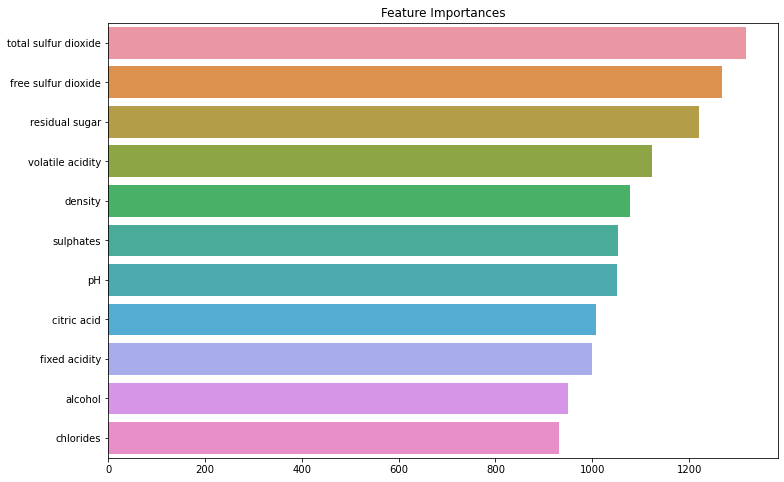

In [179]:
ftr_importances_values = model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:21]

plt.figure(figsize=(12,8))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

- 모델 저장 및 불러오기 

In [ ]:
import pickle
# 모델 저장
saved_model = pickle.dumps(clf)

# 모델 Read
clf_from_pickle = pickle.loads(saved_model)